<a href="https://colab.research.google.com/github/bayuaripermana/bayuaripermana/blob/main/15_classification_models_summary_table_ohe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/tugas 4/students_adaptability_level_online_education.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/tugas 4/students_adaptability_level_online_education.csv')
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
col=data.columns
data.shape

(1205, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


![image.png](attachment:4abd6e56-65d8-4163-ada7-51aecfaadea6.png)

In [ ]:
for i in col:
    print(i,"-",data[i].isna().sum())

Gender - 0
Age - 0
Education Level - 0
Institution Type - 0
IT Student - 0
Location - 0
Load-shedding - 0
Financial Condition - 0
Internet Type - 0
Network Type - 0
Class Duration - 0
Self Lms - 0
Device - 0
Adaptivity Level - 0


# Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
for i in col:
    fig=px.pie(data,values=data[i].value_counts(),
               names=data[i].value_counts().index,template ="simple_white",
               color_discrete_sequence = px.colors.diverging.Tropic,hole=.3)
    fig.update_layout(title_text="Distribution Of The"+i,
                      title_x=0.5,
                      font_size=15)
    fig.show()

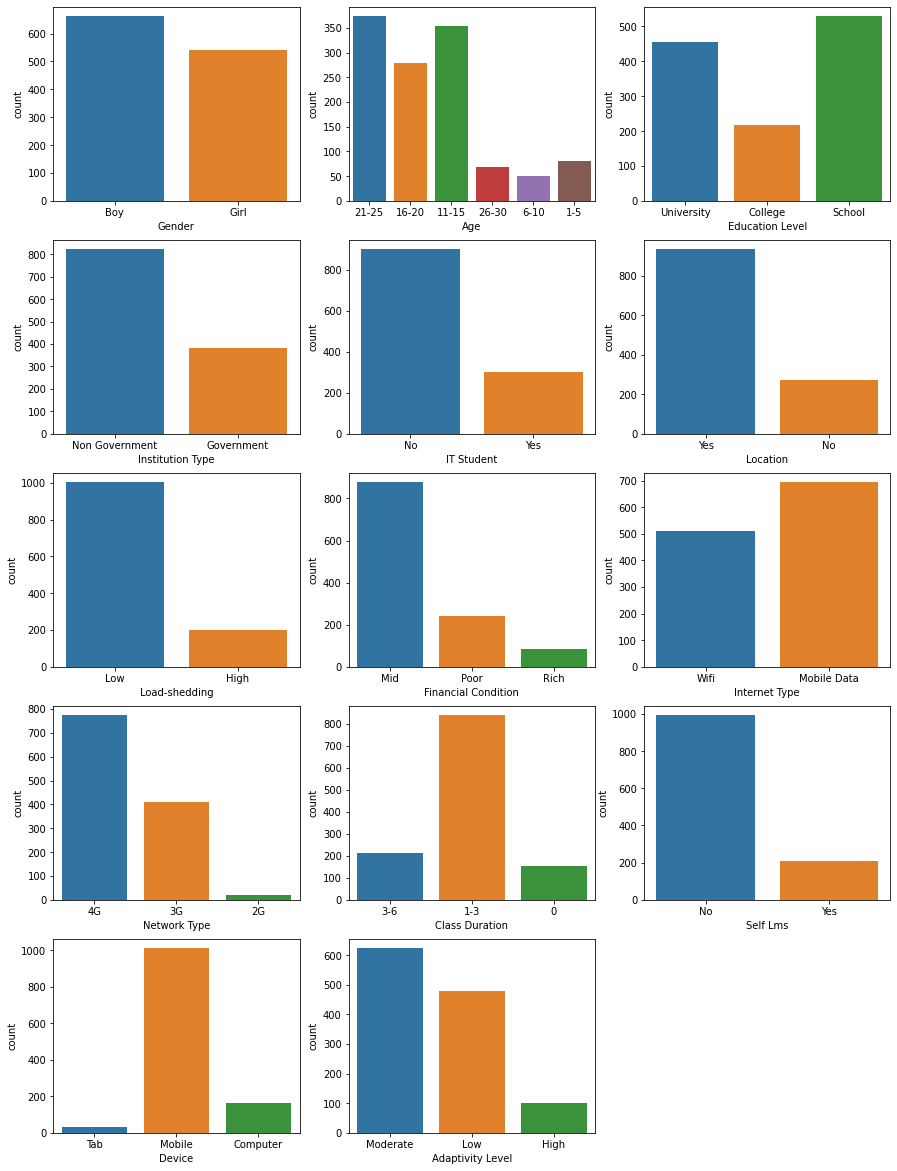

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in col:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1

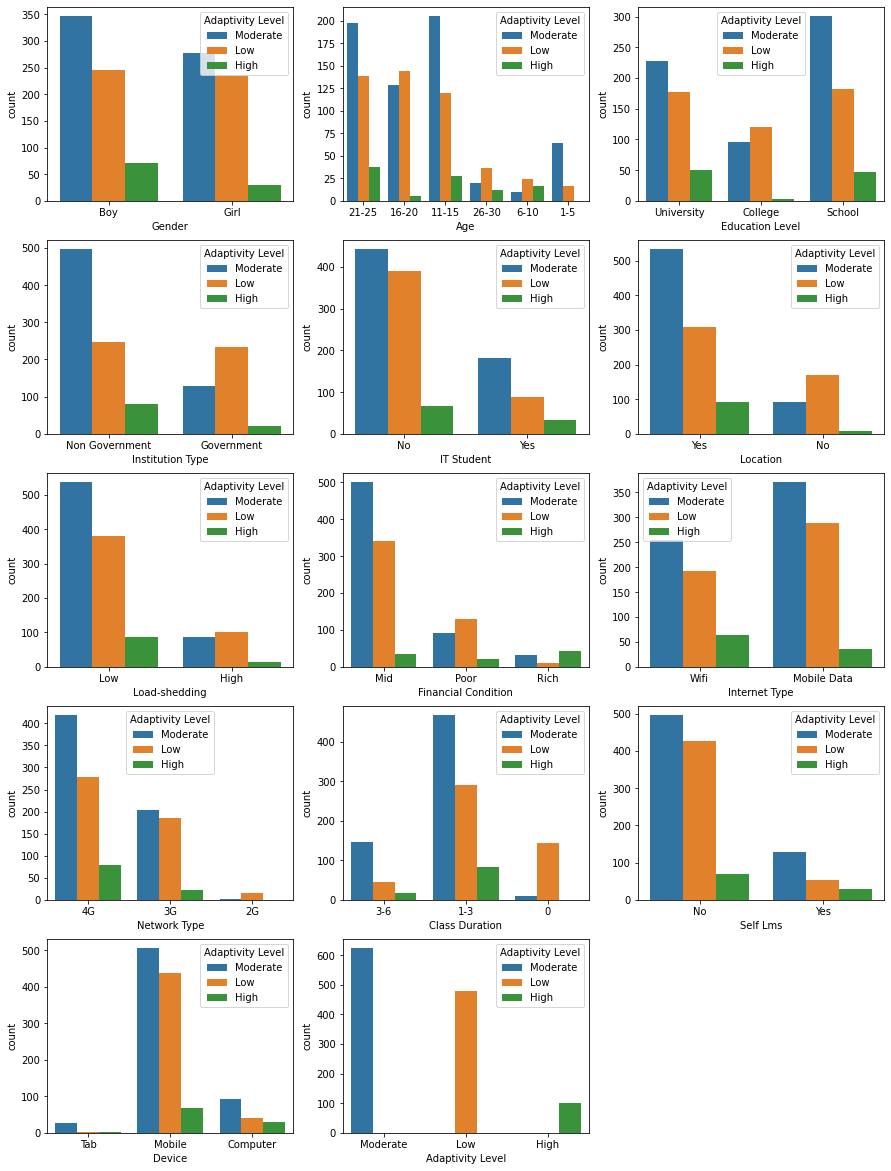

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in col:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = data)
    i +=1

# Model building

## It is a classification Problem . The Models we can consider are:

### 1)Logistic Regression
### 2)Naive Bayes
        * MultinomialNB
        * ComplementNB
        * CategoricalNB
### 3)Support vector machine
        * SVC
        * LinearSVC
### 4)KNN
        * KNeighborsClassifier
        * RadiusNeighborsClassifier
### 5)DecisionTreeClassifier
        * (GridSearchCV)
### 6)RandomForestClassifier 
        * (RandomizedSearchCV,GridSearchCV)
### 7)Ensemble
        * ExtraTreesClassifier
        * AdaBoostClassifier
### 9)XGBClassifier
        * (GridSearchCV) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay




In [ ]:
col

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

## Using One Hot Encoding here
## To see how Ordinal Encoding performs see another notebook

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device'])
one_hot_encoded_data.head()

,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,Moderate,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,Moderate,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,Moderate,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3,Moderate,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,Low,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
one_hot_encoded_data['Adaptivity Level']=one_hot_encoded_data['Adaptivity Level'].map(
{'Moderate':2,'Low':1,'High':0})

In [ ]:
X=one_hot_encoded_data.drop(['Adaptivity Level'],axis=1)
y=one_hot_encoded_data[['Adaptivity Level']]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Logistic Multiclass

In [ ]:
clf=LogisticRegression(random_state=42,multi_class='multinomial',solver='lbfgs', max_iter=500,penalty='l2',warm_start=True)
clf.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   warm_start=True)

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': True}

In [ ]:
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        39
           1       0.75      0.62      0.68       154
           2       0.64      0.82      0.72       169

    accuracy                           0.68       362
   macro avg       0.70      0.58      0.61       362
weighted avg       0.69      0.68      0.67       362



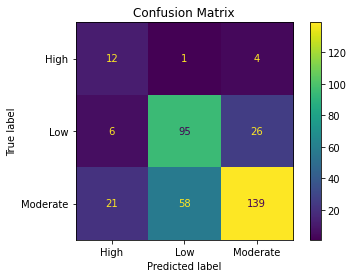

In [ ]:
cm = confusion_matrix(pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB,CategoricalNB

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48        39
           1       0.77      0.60      0.68       154
           2       0.63      0.82      0.71       169

    accuracy                           0.68       362
   macro avg       0.68      0.60      0.62       362
weighted avg       0.69      0.68      0.67       362



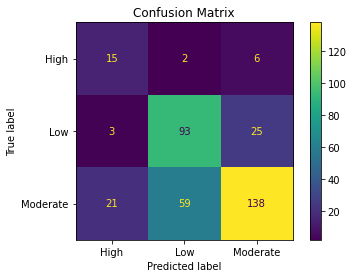

In [ ]:
cm = confusion_matrix(pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
clf = ComplementNB()
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37        39
           1       0.70      0.66      0.68       154
           2       0.61      0.71      0.66       169

    accuracy                           0.64       362
   macro avg       0.62      0.55      0.57       362
weighted avg       0.64      0.64      0.63       362



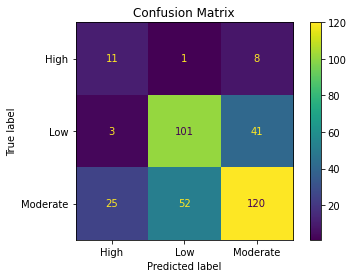

In [ ]:
cm = confusion_matrix(pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
clf = CategoricalNB()
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        39
           1       0.76      0.63      0.69       154
           2       0.66      0.79      0.72       169

    accuracy                           0.70       362
   macro avg       0.70      0.66      0.67       362
weighted avg       0.70      0.70      0.69       362



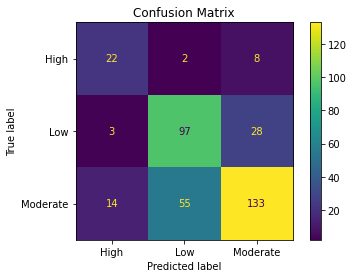

In [ ]:

cm = confusion_matrix(pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# SVM

In [ ]:
from sklearn import svm

In [ ]:
 clf = svm.SVC(C=10,kernel='poly')
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.93      0.89      0.91       154
           2       0.86      0.93      0.89       169

    accuracy                           0.89       362
   macro avg       0.88      0.84      0.85       362
weighted avg       0.89      0.89      0.89       362



In [ ]:
 clf = svm.LinearSVC()
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.31      0.44        39
           1       0.75      0.59      0.66       154
           2       0.62      0.82      0.70       169

    accuracy                           0.67       362
   macro avg       0.70      0.57      0.60       362
weighted avg       0.69      0.67      0.66       362



In [ ]:
clf = svm.SVC(decision_function_shape='ovo',C=10,kernel='poly')
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.93      0.89      0.91       154
           2       0.86      0.93      0.89       169

    accuracy                           0.89       362
   macro avg       0.88      0.84      0.85       362
weighted avg       0.89      0.89      0.89       362



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        39
           1       0.88      0.81      0.84       154
           2       0.78      0.91      0.84       169

    accuracy                           0.83       362
   macro avg       0.89      0.78      0.81       362
weighted avg       0.85      0.83      0.83       362



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y.values.ravel(),cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y.values.ravel(),cv=10)
    error_rate.append(1-score.mean())

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))

Text(0, 0.5, 'Error Rate')

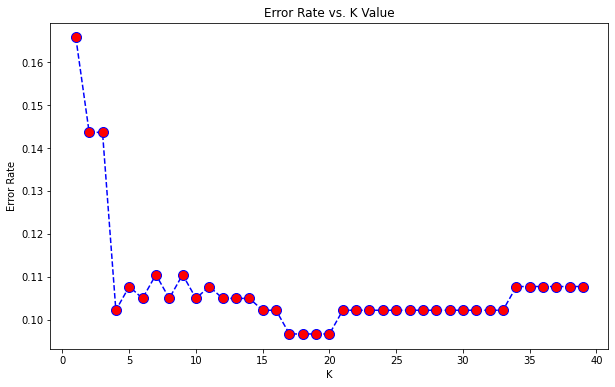

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=4,weights='distance')

knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test.values.ravel(),pred))
print('\n')
print(classification_report(y_test.values.ravel(),pred))

WITH K=4


[[ 27   0  12]
 [  3 140  11]
 [  1  10 158]]


              precision    recall  f1-score   support

           0       0.87      0.69      0.77        39
           1       0.93      0.91      0.92       154
           2       0.87      0.93      0.90       169

    accuracy                           0.90       362
   macro avg       0.89      0.85      0.87       362
weighted avg       0.90      0.90      0.90       362



# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train.values.ravel())
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        39
           1       0.93      0.90      0.91       154
           2       0.87      0.92      0.89       169

    accuracy                           0.89       362
   macro avg       0.88      0.85      0.86       362
weighted avg       0.89      0.89      0.89       362



In [ ]:
params = {
    'max_depth': range(1,20,2),
    'min_samples_leaf': range(1,100,5),
    'min_samples_split': range(2,10),
    'criterion': ["gini", "entropy"],
    'splitter':['best', 'random'],
    'max_features': ['auto']
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy",error_score='raise')

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())

Fitting 4 folds for each of 6400 candidates, totalling 25600 fits


GridSearchCV(cv=4, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 100, 5),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005213,0.001506,0.002625,0.000059,gini,1,auto,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.549763,0.639810,0.568720,0.595238,0.588383,0.033800,5214
1,0.003723,0.000057,0.002496,0.000071,gini,1,auto,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.549763,0.639810,0.620853,0.595238,0.601416,0.033757,4272
2,0.003729,0.000087,0.002481,0.000044,gini,1,auto,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.668246,0.540284,0.568720,0.595238,0.593122,0.047527,4873
3,0.004175,0.000860,0.002732,0.000195,gini,1,auto,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.616114,0.526066,0.563981,0.514286,0.555112,0.039719,6287
4,0.003299,0.000381,0.002310,0.000221,gini,1,auto,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.578199,0.639810,0.563981,0.628571,0.602640,0.032195,4138


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5760,0.004148,0.000044,0.002536,0.000018,entropy,17,auto,1,2,best,"{'criterion': 'entropy', 'max_depth': 17, 'max...",0.895735,0.933649,0.876777,0.895238,0.900350,0.020688,1
5761,0.004110,0.000099,0.002498,0.000039,entropy,17,auto,1,2,random,"{'criterion': 'entropy', 'max_depth': 17, 'max...",0.886256,0.919431,0.890995,0.890476,0.896790,0.013201,2
2560,0.003900,0.000053,0.002443,0.000033,gini,17,auto,1,2,best,"{'criterion': 'gini', 'max_depth': 17, 'max_fe...",0.895735,0.924171,0.886256,0.880952,0.896778,0.016678,3
2881,0.003870,0.000018,0.002389,0.000028,gini,19,auto,1,2,random,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.867299,0.928910,0.886256,0.890476,0.893235,0.022370,4
2880,0.004000,0.000068,0.002414,0.000020,gini,19,auto,1,2,best,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.886256,0.914692,0.857820,0.900000,0.889692,0.020970,5


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='auto')

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.9359430604982206
Train Confusion Matrix:
[[ 49   0  12]
 [  2 315   9]
 [  2  29 425]]
--------------------------------------------------
Test Accuracy : 0.8812154696132597
Test Confusion Matrix:
[[ 30   0   9]
 [  3 133  18]
 [  1  12 156]]


In [ ]:
pred = dt_best.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.92      0.86      0.89       154
           2       0.85      0.92      0.89       169

    accuracy                           0.88       362
   macro avg       0.88      0.85      0.87       362
weighted avg       0.88      0.88      0.88       362



In [ ]:
#https://www.researchgate.net/publication/355891881_Students'_Adaptability_Level_Prediction_in_Online_Education_using_Machine_Learning_Approaches

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train.values.ravel())
pred = dt_best.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.92      0.86      0.89       154
           2       0.85      0.92      0.89       169

    accuracy                           0.88       362
   macro avg       0.88      0.85      0.87       362
weighted avg       0.88      0.88      0.88       362



In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
pred = rf_random.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        39
           1       0.92      0.91      0.92       154
           2       0.87      0.92      0.90       169

    accuracy                           0.89       362
   macro avg       0.89      0.84      0.86       362
weighted avg       0.89      0.89      0.89       362



In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
pred = grid_search.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.87      0.79      0.83       154
           2       0.74      0.90      0.81       169

    accuracy                           0.80       362
   macro avg       0.82      0.69      0.72       362
weighted avg       0.81      0.80      0.79       362



# Ensemble

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train.values.ravel())

ExtraTreesClassifier(random_state=0)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        39
           1       0.90      0.90      0.90       154
           2       0.86      0.90      0.88       169

    accuracy                           0.88       362
   macro avg       0.88      0.83      0.85       362
weighted avg       0.88      0.88      0.87       362



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train.values.ravel())

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        39
           1       0.72      0.69      0.71       154
           2       0.64      0.75      0.69       169

    accuracy                           0.68       362
   macro avg       0.69      0.58      0.61       362
weighted avg       0.68      0.68      0.67       362



In [ ]:
ab_clf = AdaBoostClassifier(random_state=0)
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R'],
}
clf = GridSearchCV(ab_clf, parameters, cv=5,  n_jobs = -1, verbose = 2)
clf.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]},
             verbose=2)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.63      0.31      0.41        39
           1       0.77      0.55      0.64       154
           2       0.61      0.83      0.70       169

    accuracy                           0.66       362
   macro avg       0.67      0.56      0.59       362
weighted avg       0.68      0.66      0.65       362



# XGB

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train.values.ravel())

XGBClassifier(objective='multi:softprob')

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.63      0.31      0.41        39
           1       0.77      0.55      0.64       154
           2       0.61      0.83      0.70       169

    accuracy                           0.66       362
   macro avg       0.67      0.56      0.59       362
weighted avg       0.68      0.66      0.65       362



In [ ]:
#param_grid ={'gamma': [0.1,0.4,0.8],
 #             'learning_rate': [0.01,0.1, 0.300000012],
  #            'max_depth': [6,8,10],
   #           'n_estimators': [65,100,130],
    #          'reg_alpha': [0,0.2,0.4],
     #         'reg_lambda': [0.2,0.8,1.6]}

In [84]:
param_grid = {'gamma': [0.1,0.4,0.8,1.6,3.2],
              'learning_rate': [ 0.01,0.1, 0.300000012, 0.2, 0.6],
              'max_depth': [6,8,10,12],
              'n_estimators': [65,100,130],
              'reg_alpha': [0,0.2,0.4,0.8,1.6,3.2],
              'reg_lambda': [0.2,0.4,0.8,1.6]}